# Plotting the Forbidden Region
We'll show how to compute the Jacobi Constant and use it to constrain our system

In [38]:
@time using ThreeBodyProblem
@time using OrdinaryDiffEq
@time using Plots

  0.000064 seconds (98 allocations: 7.672 KiB)
  0.000040 seconds (98 allocations: 7.656 KiB)
  0.000039 seconds (98 allocations: 7.656 KiB)


### We'll work in the Earth-Moon system because the mass parameter is relatively large

In [39]:
sys = earth_moon() # earth-moon system

System(Body(5.97237e24, 6371.0084, 1.495978976276167e8, 3.155814910224e7, "Earth", :blue), Body(7.3457905697975825e22, 1737.5, 384400.0, 2.3606208e6, "Moon", :grey), 384400.0, 2.3606208e6, 398613.89090999996, 4902.801, 0.012150181388514944, 6371.0084, 1737.5, 398613.89090999996, 4902.801, 0.012150181388514944, 6371.0084, 1737.5, 6.045827905697976e24, 384400.0, 375704.4690855444, 1.0231446033517257, 2.7232697173979187e-6, "Earth/Moon")

## Jacobi Constant
In the CR3BP there is only one conserved quantity, the Jacobi constant C. It is related to the mechanical energy, only it is computed in the rotating frame. The Jacobi constant is a function of the state vector, and it is a constant of motion. Here we'll show how to compute the Jacobi constant expicitly then point you to the functions that do it for you.

### First, let's define some initial conditions

In [40]:
x = 0.5;    y = 0;      z = 0; # position components
ẋ = 0;      ẏ = 0.5;    ż = 0; # velocity components

### Next we compute the relative distances to the primary and secondary bodies


In [41]:
μ = sys.μ # mass parameter
r₁ = sqrt((x + μ)^2      + y^2 + z^2) # distance to primary body
r₂ = sqrt((x - 1 + μ)^2  + y^2 + z^2) # distance to secondary body

0.4878498186114851

There is a built-in function to compute r₁ and r₂. It requires the position to be in vector form.

In [42]:
r = [x, y, z] # vector form
r₁, r₂ = computer1r2(r, sys) # distances from primary and secondary bodies to the particle

(0.512150181388515, 0.4878498186114851)

### Now we can compute the Jacobi constant

In [43]:
C =  x^2 + y^2 + 2*(1-sys.μ)/r₁ + 2*sys.μ/r₂ - (ẋ^2 + ẏ^2 + ż^2) # Jacobi constant

3.9074679690702565

Note that the first four terms only depend on the position, and the last term only depends on the velocity.
Looks a lot like potential and kinetic energy, right?
The x² and y² terms come from the fact that our reference frame is rotating. 

Again, there is a built-in function for this, but it requires the states to be in vector form.


In [44]:
rv = [x, y, z, ẋ, ẏ, ż] # state vector
C = computeC(rv,sys) # Jacobi constant

3.9074679690702565

### Compute Jacobi Constant at Zero Velocity
If we input a position vector to computeC(), it will assume the velocity is zero and return the Jacobi constant for a stationary object at that position.

In [45]:
C_pos = computeC(r,sys) # Jacobi constant with only position vector as input

4.1574679690702565

We can use this functionality to compute the Jacobi constant of the Lagrange Points


In [46]:
r_L1 = computeL1(sys) # position vector of L1
C_L1 = computeC(r_L1,sys) # Jacobi constant of L1

3.188337390220741

There's already a built-in function to compute the Jacobi constant of all the Lagrange Points.

In [47]:
CLpts = computeCLpts(sys) # Jacobi constant of all Lagrange points
CLpts[1] #  Jacobi constant of L1

3.188337390220741

### Compute Jacobi Constant of a set of Trajectories
We can also compute the Jacobi constant of a set of states or trajectory, which is a vector of vectors


In [48]:
init_conds = [rv for _ in 1:100] # repeat the initial condition 100 times in a vector of vectors
C_ic = computeC(init_conds, sys); # compute the Jacobi constant of each state (should all be equal)

If you've computed a trajectory using an ODE solver, you can just input the 'u' field of the solution


In [49]:
tspan = (0.0, 1.0) # time span
prob = ODEProblem(CR3BPdynamics!, rv, tspan, sys) # ODE problem with CR3BPdynamics! as the in-place dynamics function
traj = solve(prob, TsitPap8(), reltol=1e-12, abstol=1e-12) # solve the ODE problem with TsitPap8() as the integrator
C_traj = computeC(traj.u, sys); # compute the Jacobi constant of each state in the trajectory

### Constant of Motion
Since the Jacobi constant is a constant of motion, the maximum and minimum values of the trajectory should be the same

In [50]:
maximum(C_traj) ≈ minimum(C_traj) ? "The Jacobi Constant is constant along the trajectory" : "The Jacobi Constant is not constant along the trajectory"

"The Jacobi Constant is constant along the trajectory"

any error is due to numerical precision

## Zero-Velocity Surface
For a given Jacobi constant, we can compute the corresponding zero-velocity surface. Τhe zero-velocity surface is the set of points that share the same Jacobi constant if their velocity is zero. The zero-velocity surface is a 2D manifold, so it is a 2D surface in 3D space. However, We'll just plot the x-y plane. The zero-velocity surface is a closed surface, so we can plot it as a contour plot. The interior of the contour plot is the forbidden region.

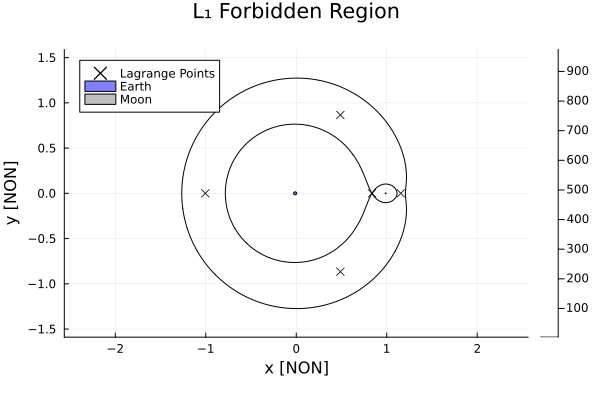

In [51]:
N = 1000 # Number of points to plot, square grid
X = Y = range(-1.5, 1.5, length=N) # Range of x and y values
f(x,y) = computeC([x,y,0],sys) # Function to plot
plot_fb = plot(sys); # Plot the system
contour!(plot_fb, X,Y,f,levels=[CLpts[1]],title="L₁ Forbidden Region") # Plot the forbidden region


### Zoom in to see the region near the secondary body

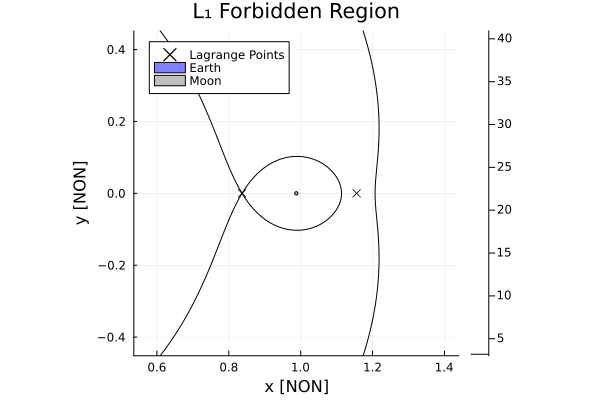

In [52]:
# Let's zoom in on the zero-velocity surface close to the secondary
N = 1000 # Number of points to plot, square grid
xlims,ylims = seczoom(sys,N=100) # Zoom in on the secondary body
X = range(xlims[1], xlims[2], length=N) # Range of x values
Y = range(ylims[1], ylims[2], length=N) # Range of y values
plot_fbzoom = plot(sys, xlims=xlims, ylims=ylims); # Plot the system
contour!(plot_fbzoom,X,Y,f,levels=[CLpts[1]],title="L₁ Forbidden Region") # Plot the forbidden region

We can see that the forbidden region comes to a point at L1. The only way to transit ballistically between the primary and secondary regions is through that point, which has zero velocity. This means transit is essentially impossible.

### Now what happens when we change the Jacobi constant to C(L₂)? 

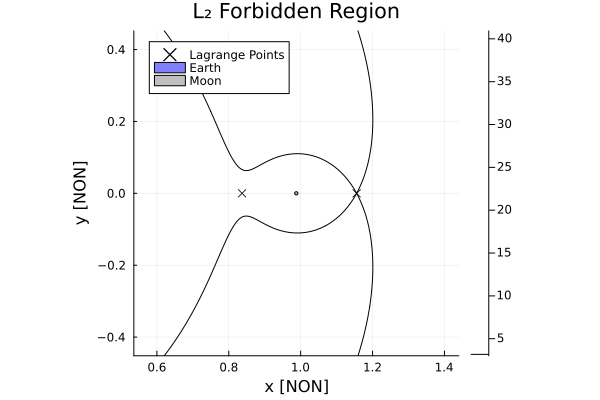

In [53]:
plot_fb = plot(sys, xlims=xlims, ylims=ylims); # Plot the system
contour!(plot_fb,X,Y,f,levels=[CLpts[2]],title="L₂ Forbidden Region") # Plot the forbidden region

There is now a large gap at L1 and many possible transit trajectories exist. The forbidden region comes to a point at L2, meaning transit between the secondary region and the exterior region is possible only through that one point (i.e. essentially impossible).

### Now what happens when we change the Jacobi constant to C(L₃)? 

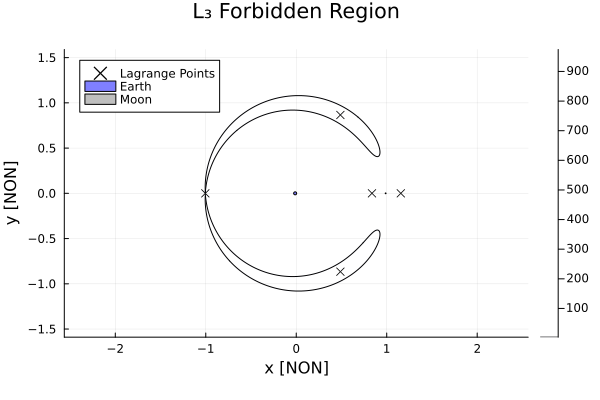

In [54]:
X = Y = range(-1.5, 1.5, length=N) # We'll have to zoom out again
plot_fb = plot(sys) # Plot the system
contour!(plot_fb,X,Y,f,levels=[CLpts[3]],title="L₃ Forbidden Region") # Plot the forbidden region

As you may have guessed, at C(L₄) = C(L₅), the forbidden region is gone entirely

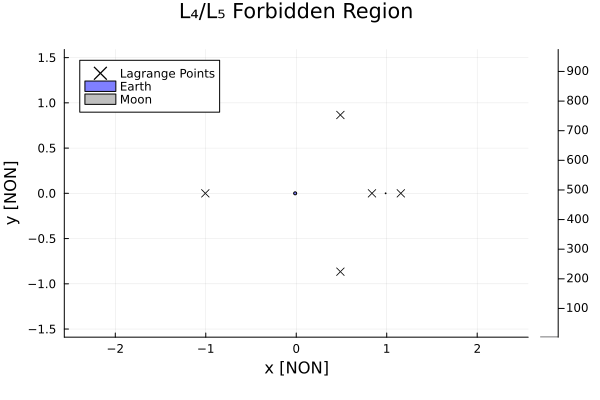

In [55]:
X = Y = range(-1.5, 1.5, length=N) # We'll have to zoom out again
plot_fb = plot(sys) # Plot the system
contour!(plot_fb,X,Y,f,levels=[CLpts[4]],title="L₄/L₅ Forbidden Region") # Plot the forbidden region